# **Importing Libraries**

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from datetime import timedelta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# **Data loading**

In [103]:
df = pd.read_excel('data_akbilgic.xlsx')
df

C:\Users\Lenovo\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


date       ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
0   2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1   2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2   2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3   2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4   2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
..         ...       ...       ...       ...       ...       ...       ...   
531 2011-02-16  0.008599  0.013400  0.006238  0.001925  0.007952  0.005717   
532 2011-02-17  0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620   
533 2011-02-18  0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568   
534 2011-02-21 -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
535 2011-02-22 -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

      BOVESPA        EU        EM  
0    0.031190  0.012698  0.028524  
1    0.018920  0.011341  0.008773  
2   -0.035899 -0.017073 -0.020015  
3    0.028283 -0.005561 -0.019424  
4   -0.009764 -0.010989 -0.007802  
..        ...       ...       ...  
531  0.018371  0.006975  0.003039  
532  0.001686 -0.000581  0.001039  
533  0.005628  0.000572  0.006938  
534 -0.011942 -0.012615 -0.000958  
535 -0.012252 -0.005465 -0.014297  

[536 rows x 10 columns]

In [104]:
df.isnull().sum()

date       0
ISE        0
ISE.1      0
SP         0
DAX        0
FTSE       0
NIKKEI     0
BOVESPA    0
EU         0
EM         0
dtype: int64

In [105]:
df.head()

date       ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
0 2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1 2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2 2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3 2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4 2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802

In [106]:
df.describe()

ISE       ISE.1          SP         DAX        FTSE      NIKKEI  \
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000   
mean     0.001629    0.001552    0.000643    0.000721    0.000510    0.000308   
std      0.016264    0.021122    0.014093    0.014557    0.012656    0.014850   
min     -0.062208   -0.084716   -0.054262   -0.052331   -0.054816   -0.050448   
25%     -0.006669   -0.009753   -0.004675   -0.006212   -0.005808   -0.007407   
50%      0.002189    0.002643    0.000876    0.000887    0.000409    0.000000   
75%      0.010584    0.013809    0.006706    0.008224    0.007428    0.007882   
max      0.068952    0.100621    0.068366    0.058951    0.050323    0.061229   

          BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  
mean     0.000935    0.000471    0.000936  
std      0.015751    0.012990    0.010501  
min     -0.053849   -0.048817   -0.038564  
25%     -0.007215   -0.005952   -0.004911  
50%      0.000279    0.000196    0.001077  
75%      0.008881    0.007792    0.006423  
max      0.063792    0.067042    0.047805

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     536 non-null    datetime64[ns]
 1   ISE      536 non-null    float64       
 2   ISE.1    536 non-null    float64       
 3   SP       536 non-null    float64       
 4   DAX      536 non-null    float64       
 5   FTSE     536 non-null    float64       
 6   NIKKEI   536 non-null    float64       
 7   BOVESPA  536 non-null    float64       
 8   EU       536 non-null    float64       
 9   EM       536 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 42.0 KB


# **Exploratory Data Analysis**

In [108]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21880\2479739926.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'date'] = pd.to_datetime(df['date'])


In [109]:
df

ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
date                                                                     
2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   
...              ...       ...       ...       ...       ...       ...   
2011-02-16  0.008599  0.013400  0.006238  0.001925  0.007952  0.005717   
2011-02-17  0.009310  0.015977  0.003071 -0.001186  0.000345  0.002620   
2011-02-18  0.000191 -0.001653  0.001923  0.002872 -0.000723  0.000568   
2011-02-21 -0.013069 -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
2011-02-22 -0.007246 -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

             BOVESPA        EU        EM  
date                                      
2009-01-05  0.031190  0.012698  0.028524  
2009-01-06  0.018920  0.011341  0.008773  
2009-01-07 -0.035899 -0.017073 -0.020015  
2009-01-08  0.028283 -0.005561 -0.019424  
2009-01-09 -0.009764 -0.010989 -0.007802  
...              ...       ...       ...  
2011-02-16  0.018371  0.006975  0.003039  
2011-02-17  0.001686 -0.000581  0.001039  
2011-02-18  0.005628  0.000572  0.006938  
2011-02-21 -0.011942 -0.012615 -0.000958  
2011-02-22 -0.012252 -0.005465 -0.014297  

[536 rows x 9 columns]

**Plotting time series for each column**

In [110]:
df.plot(subplots=True, figsize=(10, 20), title='Time Series Plots')
plt.tight_layout()
plt.show()

**Correlation matrix**

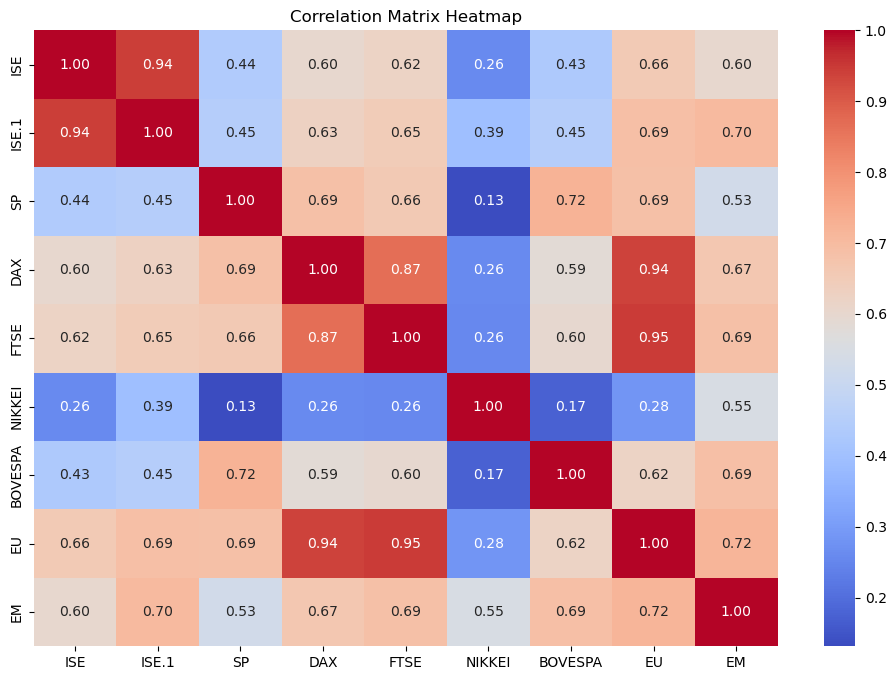

In [111]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Pairplot for a quick overview of relationships**

In [112]:
sns.pairplot(df)
plt.suptitle('Pairplot of the dataset', y=1.02)
plt.show()

**Distribution plots**

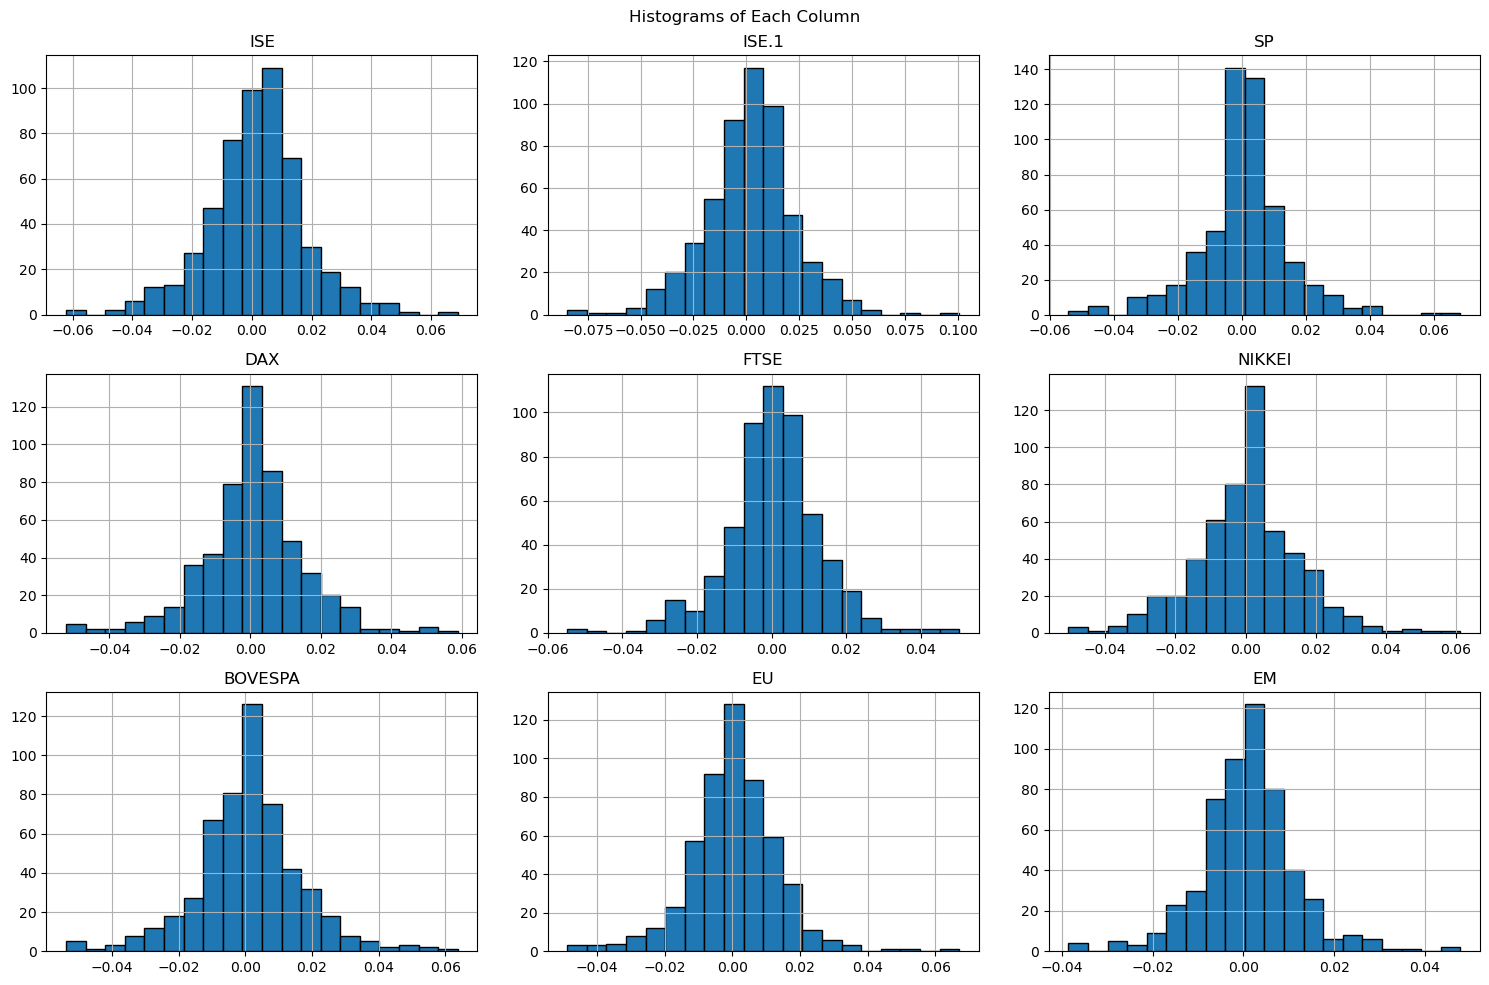

In [113]:
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Each Column')
plt.tight_layout()
plt.show()

**Box plots to check for outliers**

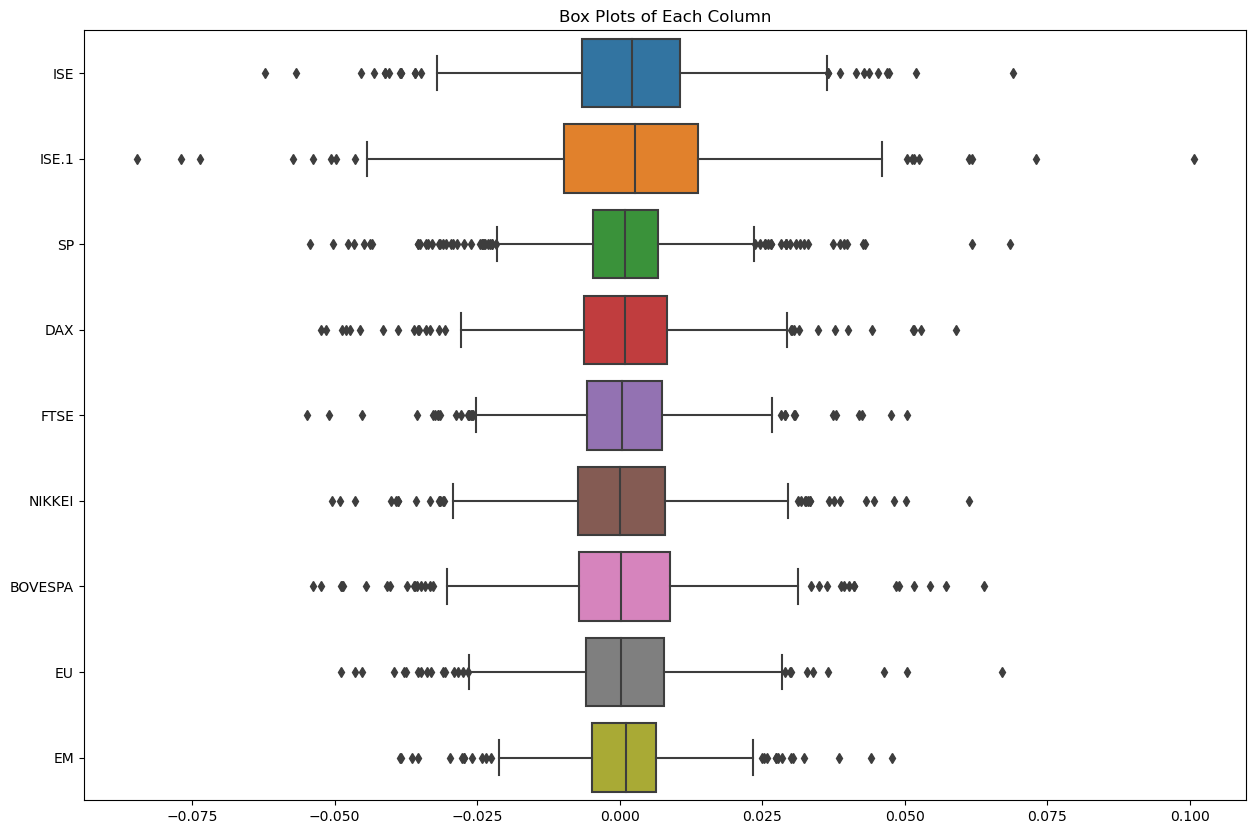

In [114]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient='h')
plt.title('Box Plots of Each Column')
plt.show()

**Rolling mean and standard deviation**

In [115]:
window = 30  # 30-day rolling window
rolling_mean = df.rolling(window=window).mean()
rolling_std = df.rolling(window=window).std()

plt.figure(figsize=(15, 10))
for column in df.columns:
    plt.plot(df.index, df[column], label=f'Original {column}', alpha=0.5)
    plt.plot(rolling_mean.index, rolling_mean[column], label=f'Rolling Mean {column}')
    plt.plot(rolling_std.index, rolling_std[column], label=f'Rolling Std {column}')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()

**Decompose time series to observe trend and seasonality**

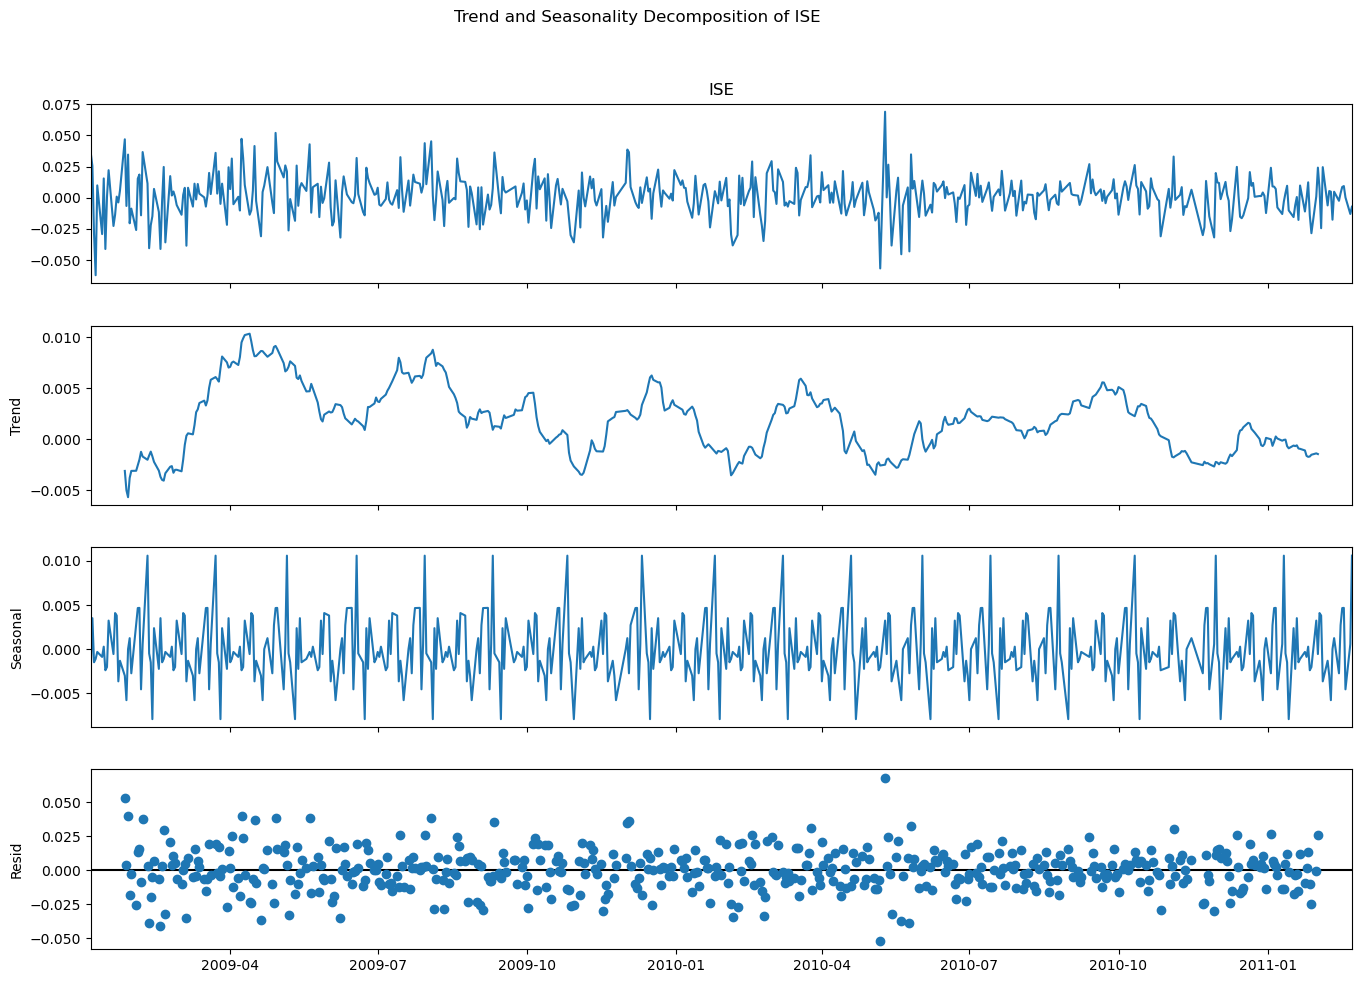

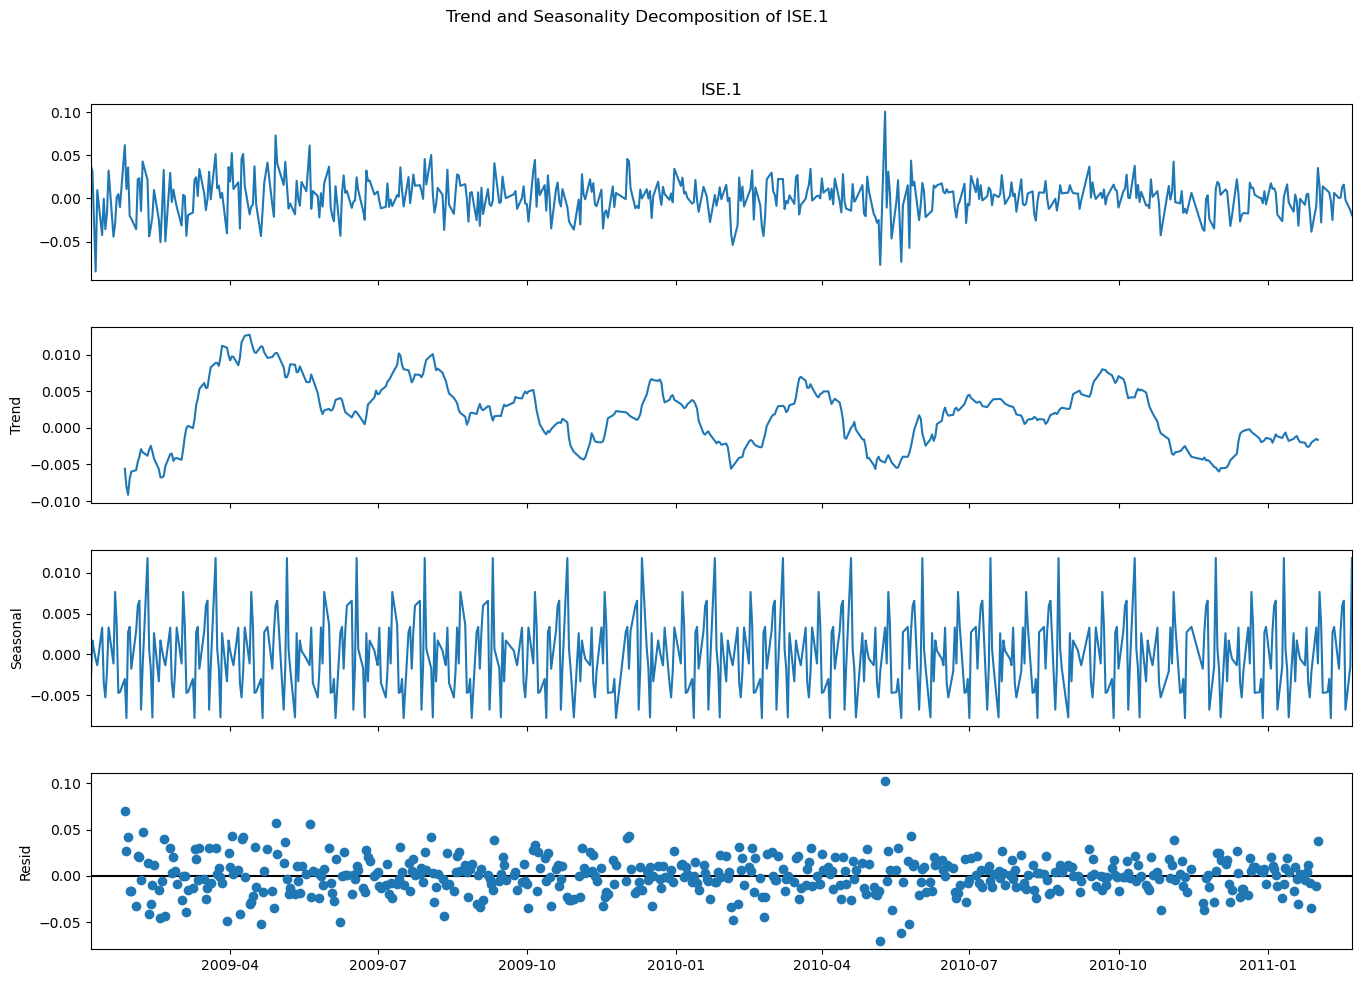

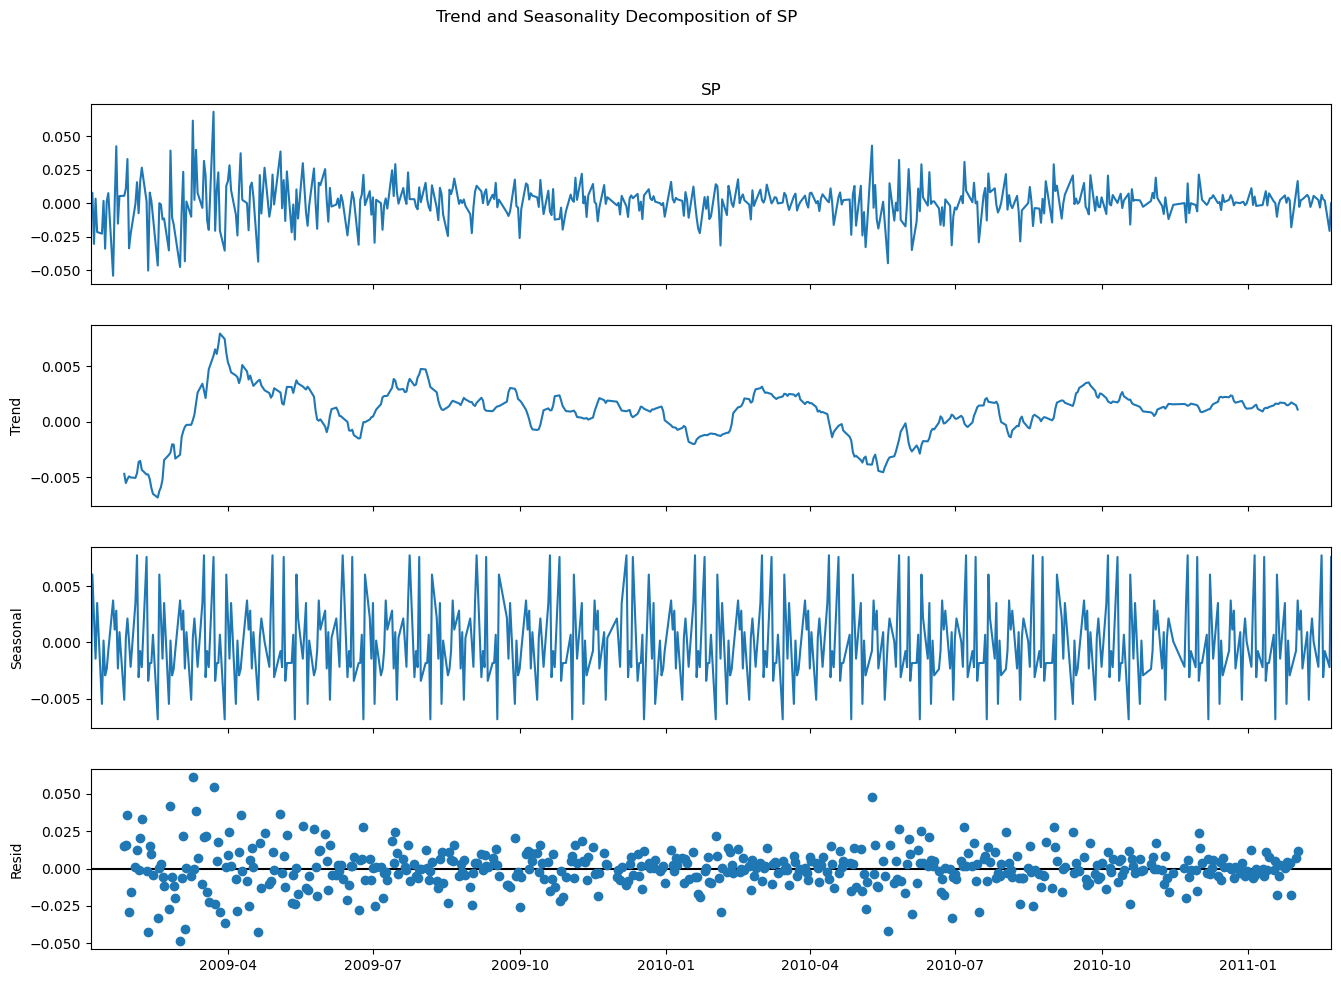

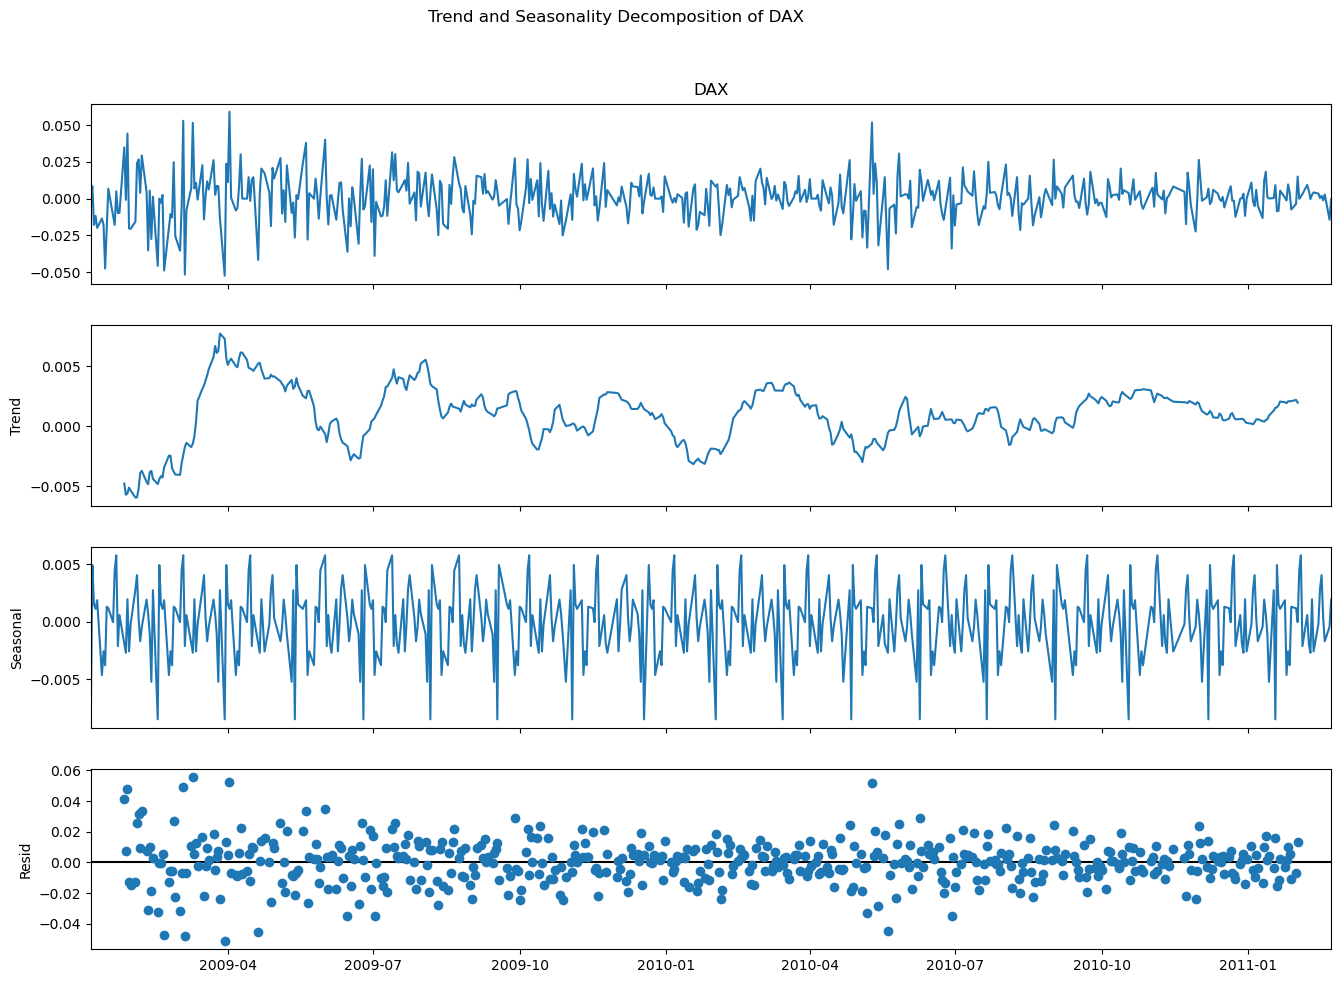

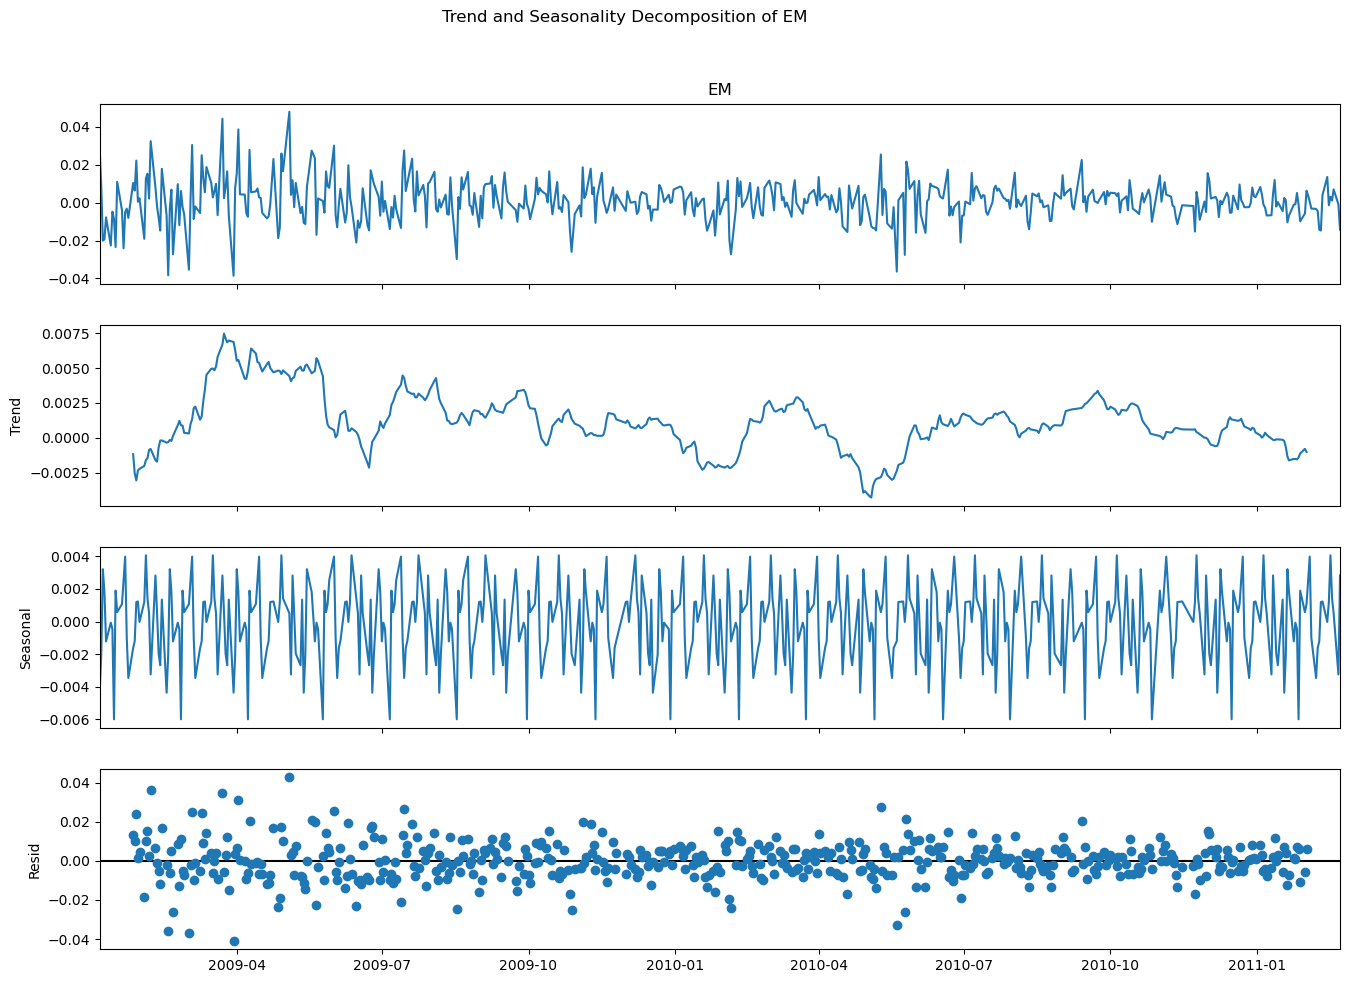

In [116]:
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=30)
    fig = decomposition.plot()
    fig.set_size_inches(15, 10)
    plt.suptitle(f'Trend and Seasonality Decomposition of {column}', y=1.02)
    plt.show()

# **Model Building And Evaluation**

## **Linear Regression**

**Target and Feature variables**

In [117]:
X = df.drop(columns=['ISE'])
y = df['ISE']

**Splitting the data into training and testing sets**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

**Training a Linear Regression model**

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Making Predicions and evaluating the model**

In [120]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.8019047581257592e-05
R^2 Score: 0.831554147977084


**Plotting the results**

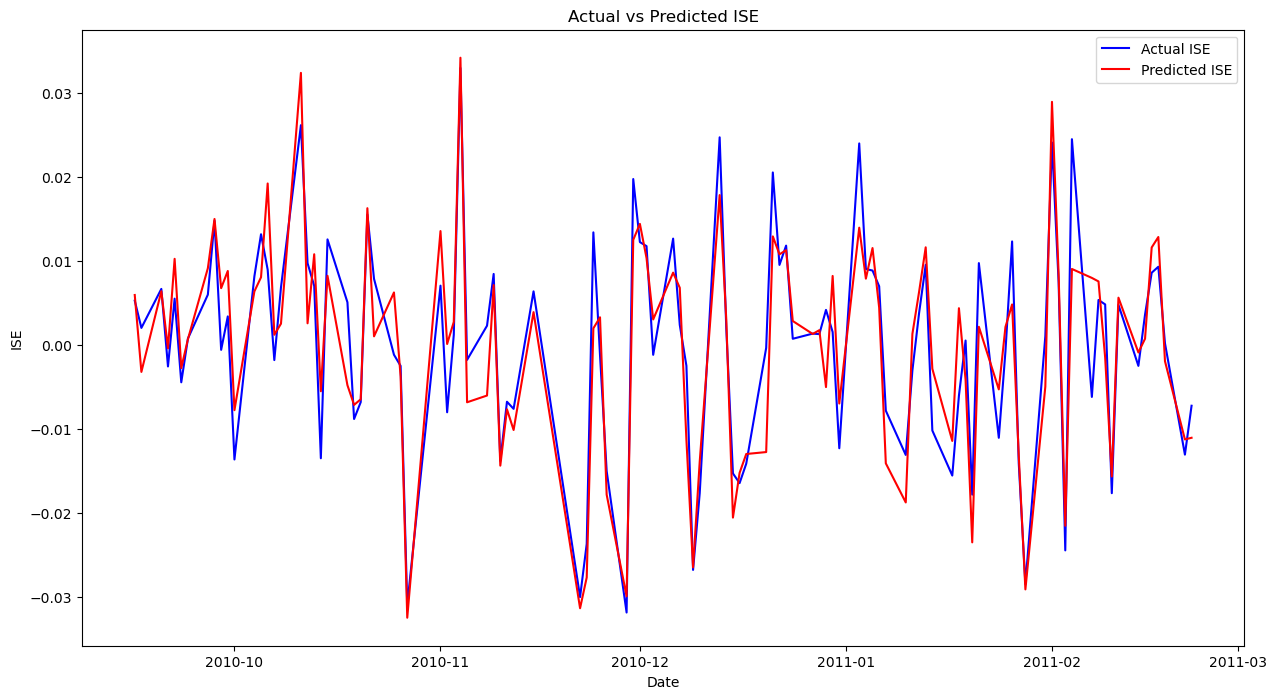

In [121]:
plt.figure(figsize=(15, 8))
plt.plot(y_test.index, y_test, label='Actual ISE', color='b')
plt.plot(y_test.index, y_pred, label='Predicted ISE', color='r')
plt.xlabel('Date')
plt.ylabel('ISE')
plt.title('Actual vs Predicted ISE')
plt.legend()
plt.show()

## **Arima Model**

**Resample to monthly data and select target variable 'ISE'**


In [122]:
monthly_data = df['ISE'].resample('M').mean()

In [123]:
monthly_data

date
2009-01-31   -0.002024
2009-02-28   -0.003820
2009-03-31    0.003175
2009-04-30    0.009799
2009-05-31    0.005297
2009-06-30    0.002460
2009-07-31    0.006229
2009-08-31    0.004178
2009-09-30    0.001439
2009-10-31   -0.000727
2009-11-30   -0.001973
2009-12-31    0.006453
2010-01-31    0.001699
2010-02-28   -0.004742
2010-03-31    0.005600
2010-04-30    0.001996
2010-05-31   -0.004038
2010-06-30    0.000378
2010-07-31    0.003987
2010-08-31    0.000084
2010-09-30    0.004617
2010-10-31    0.002205
2010-11-30   -0.002686
2010-12-31    0.000433
2011-01-31   -0.002009
2011-02-28    0.001349
Freq: M, Name: ISE, dtype: float64

**Splitting the dataset**

In [124]:
train_size = int(len(monthly_data) * 0.8)

In [125]:
train_size

20

In [126]:
train, test = (monthly_data[:train_size], monthly_data[train_size:])

In [127]:
train

date
2009-01-31   -0.002024
2009-02-28   -0.003820
2009-03-31    0.003175
2009-04-30    0.009799
2009-05-31    0.005297
2009-06-30    0.002460
2009-07-31    0.006229
2009-08-31    0.004178
2009-09-30    0.001439
2009-10-31   -0.000727
2009-11-30   -0.001973
2009-12-31    0.006453
2010-01-31    0.001699
2010-02-28   -0.004742
2010-03-31    0.005600
2010-04-30    0.001996
2010-05-31   -0.004038
2010-06-30    0.000378
2010-07-31    0.003987
2010-08-31    0.000084
Freq: M, Name: ISE, dtype: float64

In [128]:
test

date
2010-09-30    0.004617
2010-10-31    0.002205
2010-11-30   -0.002686
2010-12-31    0.000433
2011-01-31   -0.002009
2011-02-28    0.001349
Freq: M, Name: ISE, dtype: float64

In [129]:
train.isnull().sum()

0

**Fitting Arima Model**

In [130]:
model = ARIMA(train, order=(5, 1, 0))

In [131]:
model

In [132]:
model_fit = model.fit()

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Forecasting

In [133]:
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

In [134]:
forecast

2010-09-30   -0.001578
2010-10-31    0.000785
2010-11-30    0.001752
2010-12-31    0.000565
2011-01-31   -0.000467
2011-02-28    0.000299
2011-03-31    0.001364
2011-04-30    0.000612
2011-05-31   -0.000216
2011-06-30    0.000496
2011-07-31    0.000998
2011-08-31    0.000465
Freq: M, Name: predicted_mean, dtype: float64

In [135]:
forecast_dates = [monthly_data.index[-1] + timedelta(days=30 * (i + 1)) for i in range(forecast_steps)]

In [136]:
forecast_dates

[Timestamp('2011-03-30 00:00:00', freq='M'),
 Timestamp('2011-04-29 00:00:00', freq='M'),
 Timestamp('2011-05-29 00:00:00', freq='M'),
 Timestamp('2011-06-28 00:00:00', freq='M'),
 Timestamp('2011-07-28 00:00:00', freq='M'),
 Timestamp('2011-08-27 00:00:00', freq='M'),
 Timestamp('2011-09-26 00:00:00', freq='M'),
 Timestamp('2011-10-26 00:00:00', freq='M'),
 Timestamp('2011-11-25 00:00:00', freq='M'),
 Timestamp('2011-12-25 00:00:00', freq='M'),
 Timestamp('2012-01-24 00:00:00', freq='M'),
 Timestamp('2012-02-23 00:00:00', freq='M')]

#### Plotting results

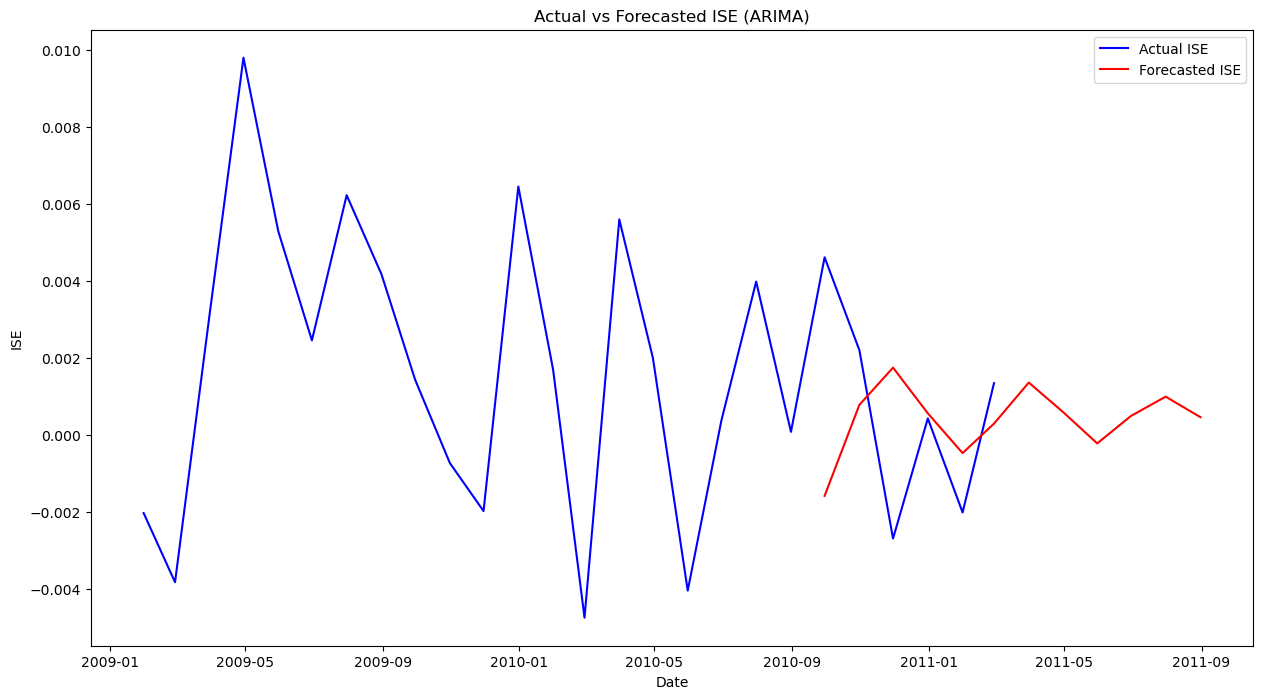

In [139]:
plt.figure(figsize=(15, 8))
plt.plot(monthly_data, label='Actual ISE', color='b')
plt.plot(forecast, label='Forecasted ISE', color='r')
plt.xlabel('Date')
plt.ylabel('ISE')
plt.title('Actual vs Forecasted ISE (ARIMA)')
plt.legend()
plt.show()

## **LSTM Model**

**Scaling the data using standard scaler**

In [26]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(monthly_data.values.reshape(-1, 1))

**Preparing the data for LSTM**

In [27]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 12
X, y = create_dataset(scaled_data, time_step)

**Splitting the dataset**

In [28]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**Reshape input to be [samples, time steps, features]**

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

**Building the LSTM model**

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

**Compiling, training and make prediction for the model**

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, epochs=100)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

Epoch 1/100
10/10 [==============================] - 4s 10ms/step - loss: 0.0747
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1364
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0619
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0688
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0577
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0571
Epoch 7/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0624
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0561
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0557
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0560
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 12/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0545
Epoch 13/100
10/10 [===============

**Inverting predictions**

In [32]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

**Calculating RMSE**

In [33]:
train_rmse = np.sqrt(np.mean((train_predict - y_train)**2))
test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 0.003067103889251505
Test RMSE: 0.0029112336674276024


**Plotting the results**

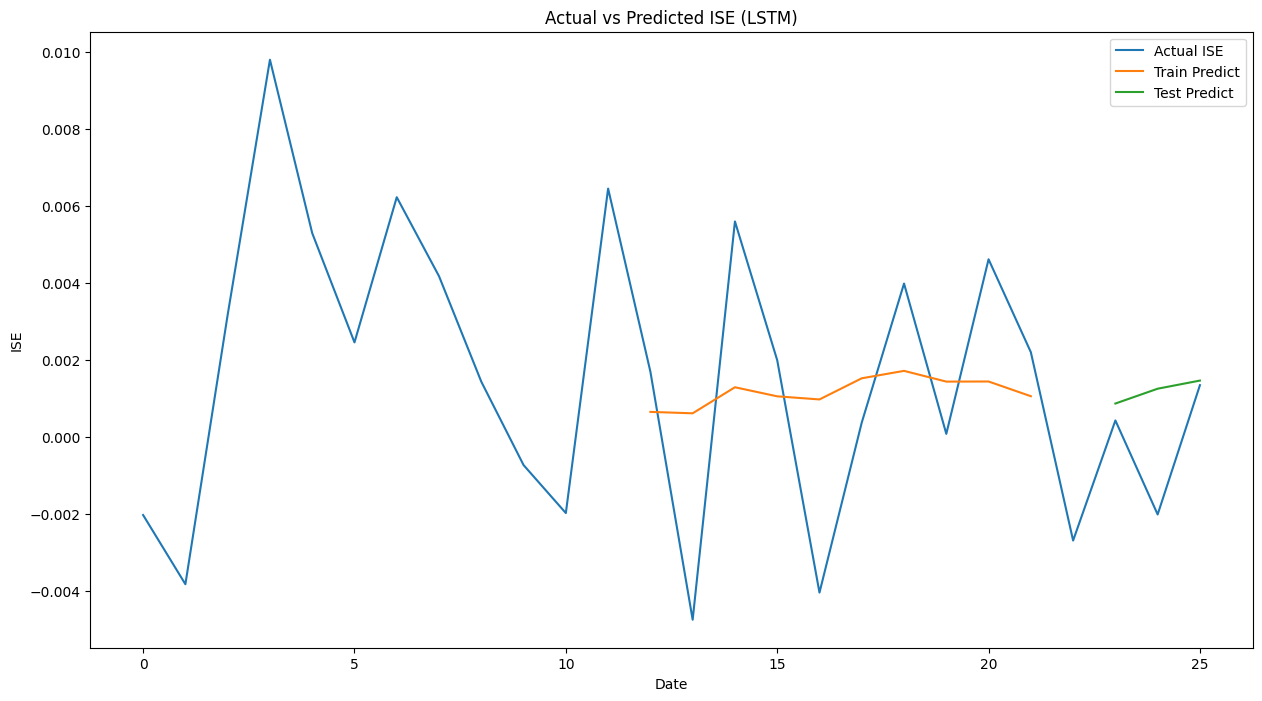

In [34]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan

test_start_idx = len(scaled_data) - len(test_predict)
test_predict_plot[test_start_idx:test_start_idx + len(test_predict), :] = test_predict

plt.figure(figsize=(15, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual ISE')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('ISE')
plt.title('Actual vs Predicted ISE (LSTM)')
plt.legend()
plt.show()